## **Predicting Horse Colic Survival: A Machine Learning Approach for Early Intervention**
### 6/16/23

**X23 Group 15 Members**:
- Andrew Kassis
- Christian Vargas
- Deniz Erisgen
- Tiffany Andersen

This data science project leverages historical medical records to effectively determine the survival probability of horses with colic by utilizing predictive models that evaluate the likelihood of their survival, taking into account past medical conditions.

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://www.animalclinicfortlupton.com/uploads/5/7/6/2/57623911/colicrxhorse-with-gi-diagram_orig.jpg")
# Animal Clinic, LLC "Colic Diagnosis" photo source  : https://www.animalclinicfortlupton.com/colic-diagnosis.html

**Objective**

To develop a predictive model capable of estimating the probability of survival for horses affected by colic. This project aims to provide valuable insights to veterinarians and horse owners, enabling them to make well-informed decisions regarding treatment options and care. Furthermore, the objective involves conducting an in-depth analysis to identify the most influential features or attributes for accurately predicting colic occurrences.

### Initial Exploration

In [ ]:
import warnings
# Ignore the warning
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import graphviz

**Read Data**

In [ ]:
# Load the dataset and test dataset from the provided link
# Training data
url = 'https://raw.githubusercontent.com/c-vargas/horse_colic_data/main/horse_colic.csv'
df = pd.read_csv(url)
# Testing data
url2 = 'https://raw.githubusercontent.com/c-vargas/horse_colic_data/main/horse_test_data.csv'
test = pd.read_csv(url2)

**Data Fields Documentation**

Please refer to the descriptions for each attribute at the following location:
[UCI Machine Learning Repository: Horse Colic Data Set](https://archive.ics.uci.edu/ml/datasets/Horse+Colic)

**Data Fields**

1. surgery? (whether the horse was treated for surgery (1 = Yes, 2 = No)

2. Age (Age of horse at time of vet visit) (1 = Adult horse, 2 = Young (< 6 months))

3. Hospital Number (Unique numeric id number, unless the horse was treated > 1 time)

4. rectal temperature (Celsius) (An an elevated temp may occur due to infection)

5. pulse (The heart rate in beats per minute, which is normally around 30-40 for adults, may be elevated in animals experiencing painful lesions or circulatory shock)

6. respiratory rate (Normal rate is 8 to 10)

7. temperature of extremities (1 = Normal, 2 = Warm, 3 = Cool, 4 = Cold) (Cool to cold extremities indicate possible shock, while hot extremities should correlate with an elevated rectal temperature)

8. peripheral pulse (1 = normal, 2 = increased, 3 = reduced, 4 = absent) (Normal or increased peripheral pulses are indicative of adequate circulation, while reduced or absent pulses indicate poor perfusion)

9. mucous membranes (1 = normal pink, 2 = bright pink, 3 = pale pink, 4 = pale cyanotic, 5 = bright red / injected, 6 = dark cyanotic) (1 and 2 probably indicate a normal or slightly increased circulation. 3 may occur in early shock. 4 and 6 are indicative of serious circulatory compromise. 5 is more indicative of a septicemia)

10. capillary refill time (The longer the refill, the poorer the circulation possible values) (1 = < 3 seconds, 2 = >= 3 seconds)

11. pain - (A subjective judgement of the horse's pain level and the more painful a condition is, the more likely it is to require surgery) (1 = alert, no pain, 2 = depressed, 3 = intermittent mild pain, 4 = intermittent severe pain, 5 = continuous severe pain)

12. peristalsis (The gut activity in a horse decreases as it becomes more distended or toxic) (1 = hypermotile, 2 = normal, 3 = hypomotile, 4 = absent)

13. abdominal distension (A horse experiencing severe abdominal distension is likely to require surgery due to the pain caused by reduced gut motility) (1 = none, 2 = slight, 3 = moderate, 4 = severe)

14. nasogastric tube (If gas is released from the tube, which acts as a large gas cap in the horse's stomach, it is expected that the horse will feel discomfort) (1 = none, 2 = slight, 3 = significant)

15. nasogastric reflux (As the amount of reflux increases, the likelihood of a significant obstruction to the passage of fluid from the rest of the intestine also increases) (1 = none , 2 = > 1 liter, 3 = < 1 liter)

16. nasogastric reflux PH (Scale is from 0 to 14 with 7 being neutral) (Normal values are in the 3 to 4 range)

17. rectal examination - feces (No stool or bowel movement present may indicate obstruction in the digestive system) (1 = normal, 2 = increased, 3 = decreased, 4 = absent)

18. abdomen (Condition or appearance of the abdomen, in which a value like 3 might indicate a form of obstruction, while values of 4 and 5 could suggest a surgical lesion) (1 = normal, 2 = other, 3 = firm feces in the large intestine, 4 = distended small intestine, 5 = distended large intestine)

19. packed cell volume (The normal range for the number of red blood cells per volume in the blood is usually between 30 and 50. However, if there are circulation issues or if the animal becomes dehydrated, the value can exceed this range)

20. total protein (Normal values typically range from 6 to 7.5 gms/dL, and higher values indicate more severe dehydration)

21. abdominocentesis appearance (Clear fluid in the abdominal cavity indicates normal appearance, while cloudy or serosanguinous indicates a compromised gut) (1 = clear, 2 = cloudy, 3 = serosanguinous)

22. abdomcentesis total protein (Values are in gms/dL, higher the level of protein the more likely the horse is to have a compromised gut)

23. outcome (Outcome for the horse) (1 = lived, 2 = died, 3 = was euthanized)

24. surgical lesion? (1 = Yes, 2 = No)

25. type of lesion
26. type of lesion
27. type of lesion
- first number is site of lesion
- second number is type
- third number is subtype
- fourth number is specific code

28. cp_data (Whether pathology data present for this case?) (1 = Yes, 2 = No)

In [ ]:
# Check the size of the dataset
data_size = df.shape
print("Data Size:", data_size)
test_size = test.shape
print("Test data Size:", test_size)

Data Size: (299, 28)
Test data Size: (89, 28)


In [ ]:
# Return the first 10 rows of data
print(df.head(10))

  surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   
5      no  adult           528355          NaN    NaN               NaN   
6     yes  adult           526802         37.9   48.0              16.0   
7     yes  adult           529607          NaN   60.0               NaN   
8      no  adult           530051          NaN   80.0              36.0   
9      no  young          5299629         38.3   90.0               NaN   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1             

In [ ]:
# Display the count of unique data types
print(df.dtypes.value_counts())

object     17
float64     7
int64       4
dtype: int64


In [ ]:
# Get the types of each column
column_types = df.dtypes
print("Column Types:")
print(column_types)

Column Types:
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object


In [ ]:
# Count the number of missing values in each column
na_count = df.isnull().sum()
print("NA Values:")
print(na_count)

NA Values:
surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


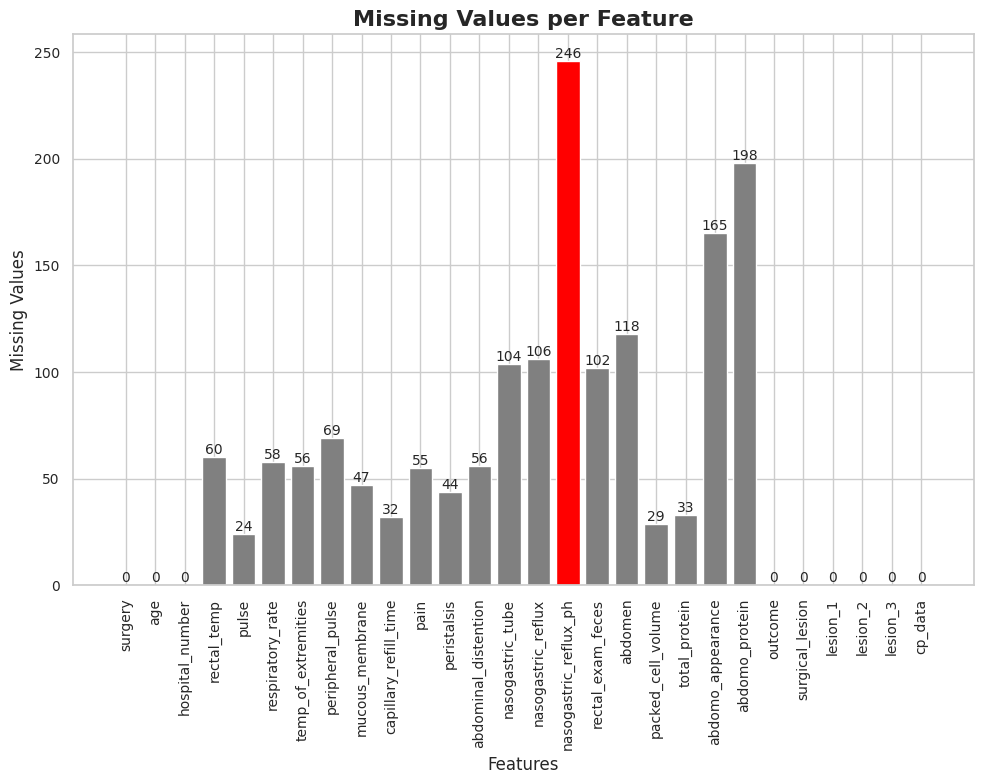

In [ ]:
# Bar chart to illustrate missing values per feature
# This visualization is helpful to visualize the top features to potentially delete
plt.figure(figsize=(10, 8))
# Customize bar colors
colors = ['red' if value == max(na_count) else 'gray' for value in na_count]
plt.bar(range(len(na_count)), na_count, color=colors)
plt.title('Missing Values per Feature', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
# Adjust the x-ticks properties
plt.xticks(np.arange(len(df.columns)), df.columns.values, rotation='vertical', fontsize=10)
# Adjust the y-ticks properties
plt.yticks(fontsize=10)
# Adding value labels to the bars
for i, value in enumerate(na_count):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

Correlation Coefficient: 0.22


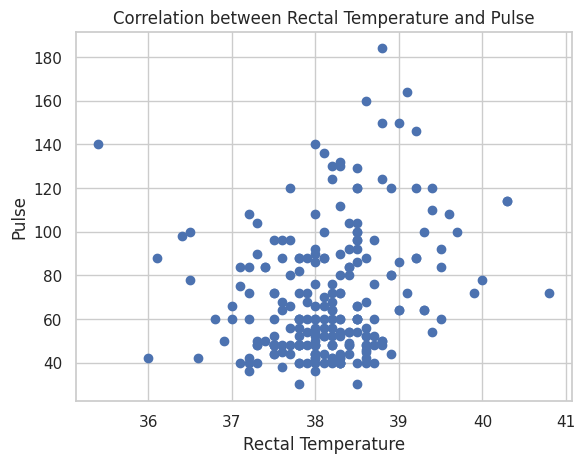

In [ ]:
# The correlation between recal_temp and pulse is approximately 0.20, indicating a weak positive correlation
correlation_matrix = df[['rectal_temp', 'pulse']].corr()
correlation_coefficient = correlation_matrix.loc['rectal_temp', 'pulse']
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
# Calculate the correlation coefficient
x = df['rectal_temp']
y = df['pulse']
plt.scatter(x, y)
plt.xlabel('Rectal Temperature')
plt.ylabel('Pulse')
plt.title('Correlation between Rectal Temperature and Pulse')
plt.show()

<Axes: >

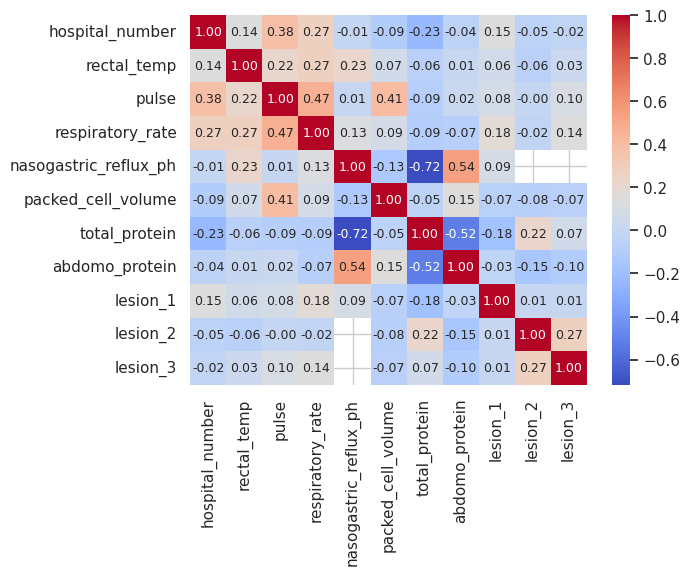

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True,fmt='.2f',annot_kws={'fontsize':9}, cmap='coolwarm')

In [ ]:
# Check the number of missing values (NA values)
missing_values = df.isna().sum().sum()
print("Number of missing values in the dataset:", missing_values)

Number of missing values in the dataset: 1602


In [ ]:
# Check for obviously bad data (e.g., outliers, unrealistic values)
print(df.describe().to_string(float_format="{:.2f}".format))

       hospital_number  rectal_temp  pulse  respiratory_rate  nasogastric_reflux_ph  packed_cell_volume  total_protein  abdomo_protein  lesion_1  lesion_2  lesion_3
count           299.00       239.00 275.00            241.00                  53.00              270.00         266.00          101.00    299.00    299.00    299.00
mean        1087732.70        38.17  72.00             30.46                   4.71               46.31          24.27            3.04   3659.71     90.53      7.39
std         1532031.58         0.73  28.65             17.67                   1.98               10.44          27.36            1.97   5408.47    650.64    127.75
min          518476.00        35.40  30.00              8.00                   1.00               23.00           3.30            0.10      0.00      0.00      0.00
25%          528904.00        37.80  48.00             18.00                   3.00               38.00           6.50            2.00   2111.50      0.00      0.00
50%       

In [ ]:
# Additional information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

### Initial preprocessing and cleaning

In [ ]:
# Delete unecessary columns
df.drop(['cp_data', 'hospital_number'], axis=1, inplace=True)
# 'hospital_number' does not provide any meaningful information and just serves as a unique identifier.
# 'cp_data' refers to whether pathology data is present for a given case (1 = Yes, 2 = No).
# However, this variable is not significant as pathology data is neither included nor collected for these cases

In [ ]:
# Percentage of missing data by column
missing_percentage = df.isnull().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
# Format output and order by descending order
print("Missing Percentage (Descending Order):")
print(missing_percentage_sorted.apply(lambda x: f"{x:.2f}%"))

Missing Percentage (Descending Order):
nasogastric_reflux_ph    82.27%
abdomo_protein           66.22%
abdomo_appearance        55.18%
abdomen                  39.46%
nasogastric_reflux       35.45%
nasogastric_tube         34.78%
rectal_exam_feces        34.11%
peripheral_pulse         23.08%
rectal_temp              20.07%
respiratory_rate         19.40%
abdominal_distention     18.73%
temp_of_extremities      18.73%
pain                     18.39%
mucous_membrane          15.72%
peristalsis              14.72%
total_protein            11.04%
capillary_refill_time    10.70%
packed_cell_volume        9.70%
pulse                     8.03%
surgical_lesion           0.00%
lesion_2                  0.00%
lesion_1                  0.00%
surgery                   0.00%
outcome                   0.00%
age                       0.00%
lesion_3                  0.00%
dtype: object


In [ ]:
# Remove columns with lots of missing data (threshold at 50%)
# Flexible to test various percentage threholds
threshold = 50
columns_to_drop = df.columns[missing_percentage > threshold]
df.drop(columns_to_drop, axis=1, inplace=True)

**NOTE**: To reduce redundancy, additional data cleaning is performed in the
Method Selection section for both training and test datasets when they are merged.
These modifications include the following:
- Converting categorical data to numeric using One Hot Encoding.
- Filling missing values in categorical columns with the mode (most frequent value).
- Filling missing values in numerical columns with the median.

### Exploration and Visualization

In [ ]:
print(df.outcome.value_counts())

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64


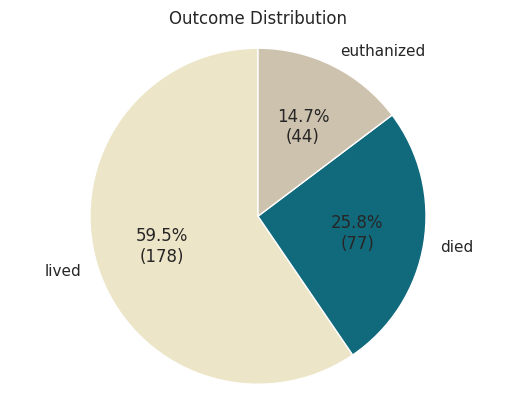

In [ ]:
# Calculate the counts for each 'outcome' category

category_counts = df['outcome'].value_counts()
outcome_names = {0: 'Died', 1: 'Euthanized', 2: 'Lived'}
# Create a pie chart with count and percentage
labels = [outcome_names.get(label, label) for label in category_counts.index]
sizes = category_counts.values
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

autopct = lambda p: '{:.1f}%\n({:.0f})'.format(p, (p/100) * total)
colors = ['#ECE5C7', '#116A7B', '#CDC2AE']

plt.pie(sizes, labels=labels, autopct=autopct, startangle=90, colors=colors)
plt.axis('equal')
plt.title('Outcome Distribution')
plt.show()

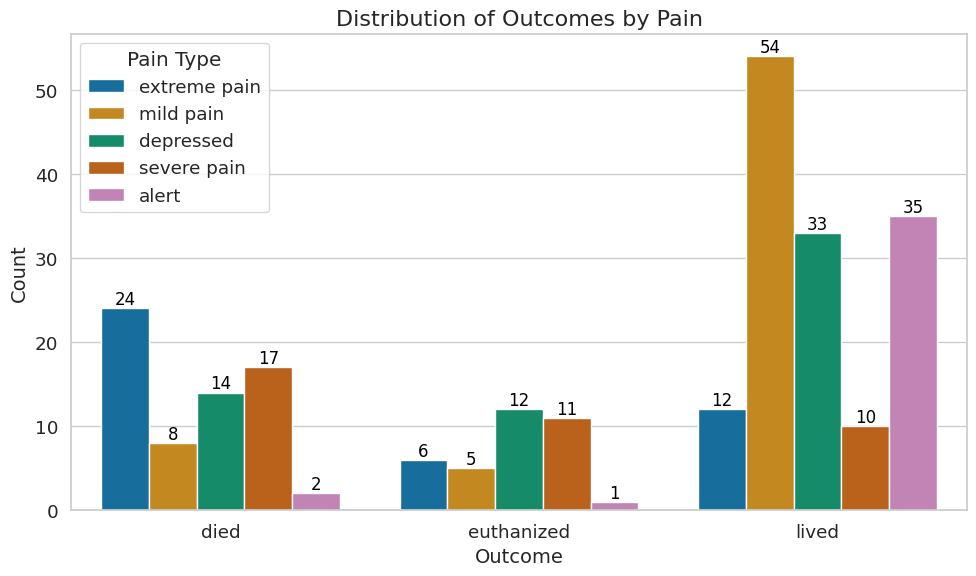

In [ ]:
# Figure showing that horses exhibiting the highest symptoms of extreme pain, severe pain, and depression ultimately died.
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='outcome', hue='pain', palette='colorblind')
ax.set_xlabel('Outcome', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Outcomes by Pain', fontsize=16)
legend = ax.legend(title='Pain', loc='upper left')
handles, labels = ax.get_legend_handles_labels()
# Remove underscores from legend labels
new_labels = [label.replace('_', ' ') for label in labels]
ax.legend(handles, new_labels, title = 'Pain Type', loc='upper left')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',
                va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

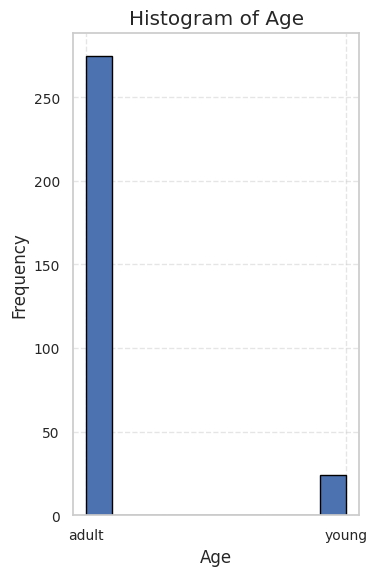

In [ ]:
# Histograms of single numeric value (age of horse)
plt.figure(figsize=(4, 6))
plt.hist(df['age'], bins='auto', edgecolor='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

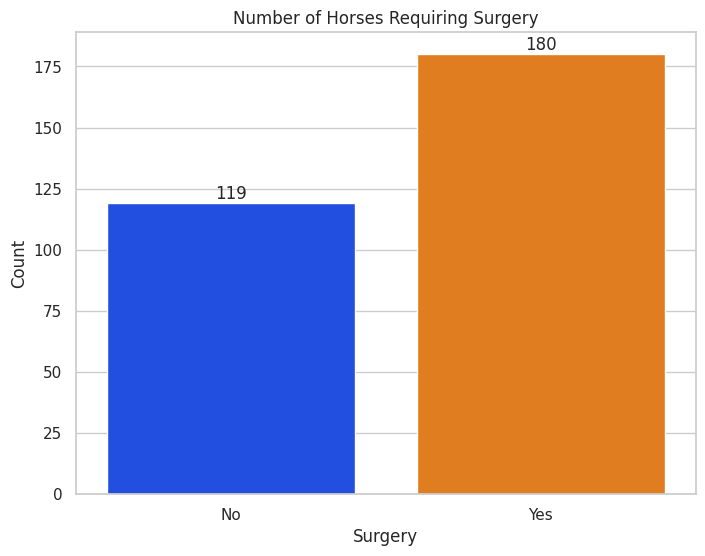

In [ ]:
# Bar plots of value counts of single categorical variable (surgery)
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='surgery', data=df, palette='bright')
plt.xlabel('Surgery')
plt.ylabel('Count')
plt.title('Number of Horses Requiring Surgery')
plt.xticks([0, 1], ['No', 'Yes'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

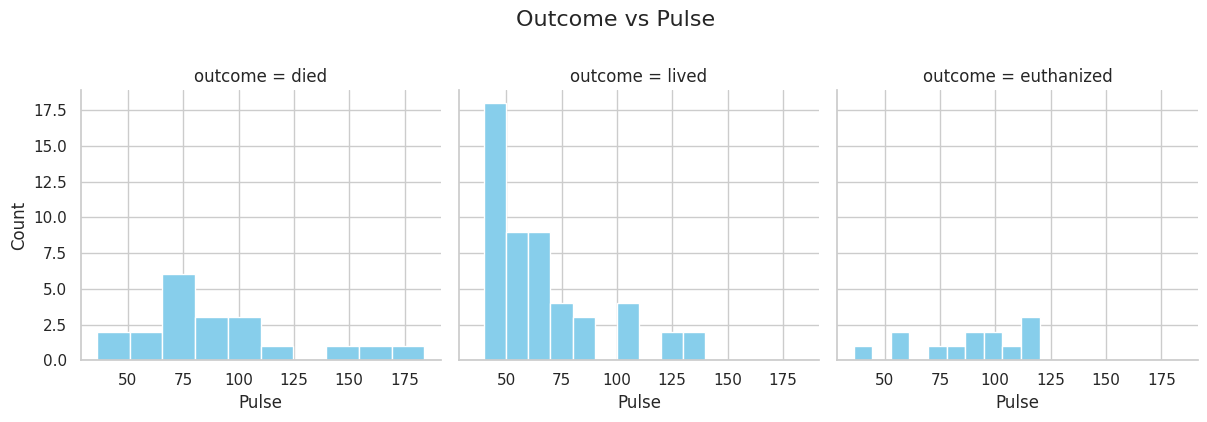

In [ ]:
# Subplots indicating that horses that died had a pulse of around 70 bpm, while
# horses that lived had the highest pulse count at approximately 40 bpm.
sns.set(style="whitegrid")
facet_grid = sns.FacetGrid(data=test, col='outcome', margin_titles=True, height=4)
facet_grid .map(plt.hist, 'pulse', bins=10, color='skyblue', edgecolor='white')
plt.subplots_adjust(top=0.85)
facet_grid.fig.suptitle('Outcome vs Pulse', fontsize=16, y=1.05)
facet_grid.set_axis_labels('Pulse', 'Count')
plt.show()

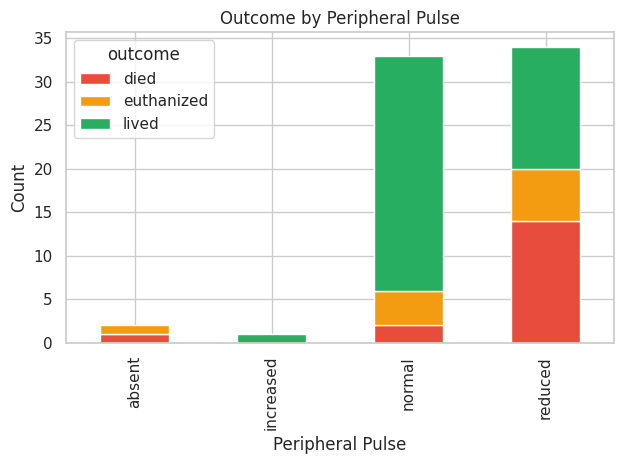

In [ ]:
# Pivot table to count the occurrences of each peripheral pulse by outcome
sns.set(style="whitegrid")
pivot_table = test.pivot_table(index='peripheral_pulse', columns='outcome', aggfunc='size', fill_value=0)
# Reorder columns based on outcome categories
pivot_table = pivot_table[['died', 'euthanized', 'lived']]
ax = pivot_table.plot(kind='bar', stacked=True, color=['#E74C3C', '#F39C12', '#27AE60'])
ax.set_title('Outcome by Peripheral Pulse')
ax.set_xlabel('Peripheral Pulse')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

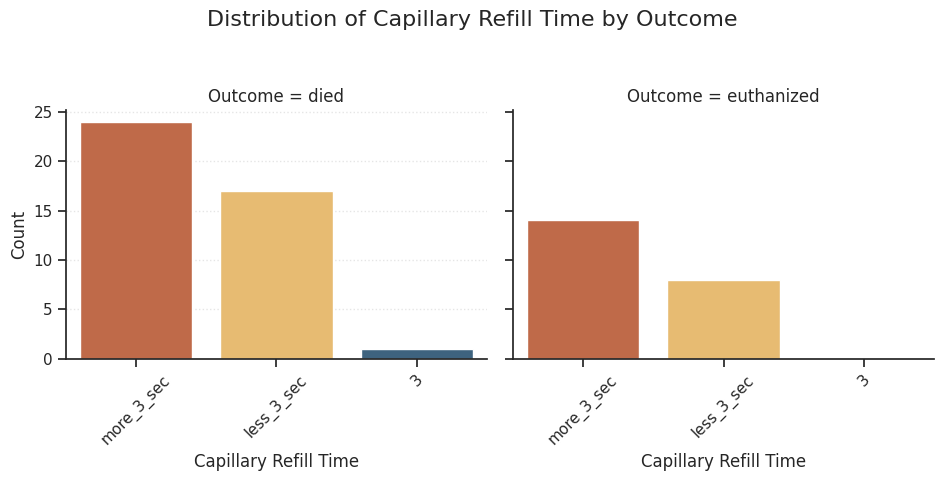

In [ ]:
# Query the counts for horses that either died or were euthanized and also had
# a reduced or absent peripheral pulse, as these two values indicate
# poor perfusion. Additionally, cross-reference this data with capillary
# refill time, as a longer refill time suggests poorer circulation.

custom_color_palette = ['#d36135','#fac05e', '#33658a']

# Filter the DataFrame based on conditions
reduced_absent_pulse_df = df[
    (df['outcome'].isin(['died', 'euthanized'])) &
    (df['peripheral_pulse'].isin(['reduced', 'absent']))
]

sns.set_style("ticks")

capillary_refill_plot = sns.catplot(
    data=reduced_absent_pulse_df,
    x='capillary_refill_time',
    col='outcome',
    kind='count',
    palette=custom_color_palette,
    height=4,
    aspect=1.2
)

capillary_refill_plot.set_titles('Outcome = {col_name}')
capillary_refill_plot.set_xlabels('Capillary Refill Time')
capillary_refill_plot.set_ylabels('Count')
sns.despine()
capillary_refill_plot.set_xticklabels(rotation=45)
capillary_refill_plot.fig.suptitle('Distribution of Capillary Refill Time by Outcome', y=1.05, fontsize=16)
capillary_refill_plot.axes.flat[0].grid(axis='y', linestyle=':', alpha=0.5)
capillary_refill_plot.fig.subplots_adjust(top=0.8)
plt.show()

## Method Selection
To improve the model's performance, the regular training dataset is combined with the test dataset. This will train the model on a wider range of data, enabling better generalization and evaluation of its effectiveness in various scenarios. The merged dataset facilitates a more comprehensive assessment of the model.

In [ ]:
# Joining the regular dataset and the test-train dataset
train_dataset_index = df.shape[0]
test_dataset_index = test.shape[0]

merged_dataset = pd.concat(objs=[df, test], axis=0, ignore_index=True)
# Before joining
print("Train Dataset Shape: {} rows, {} columns".format(df.shape[0], df.shape[1]))
print("Test Dataset Shape: {} rows, {} columns\n".format(test.shape[0], test.shape[1]))
# After joining
print("Merged Dataset Shape: {} rows, {} columns".format(merged_dataset.shape[0], merged_dataset.shape[1]))

Train Dataset Shape: 299 rows, 23 columns
Test Dataset Shape: 89 rows, 28 columns

Merged Dataset Shape: 388 rows, 28 columns


#### Feature Engineering

**Techniques and Preprocessing Employed**

Various feature engineering techniques are employed to prepare the dataset for further analysis, taking into account the percentage of missing values and the data type of each column.

- ***One-Hot Encoding***: Categorical data is converted into numeric data using one-hot encoding.

- ***Removal of columns with high missing percentages***: Columns with more than 50% missing values are considered for removal from the dataset, eliminating columns with insufficient data.

- ***Mode imputation*** for categorical columns: Missing values in categorical columns (identified by the dtype == 'object' condition) are filled using the mode.

- ***Median imputation*** for numerical columns: Missing values in numerical columns are filled using the median value of that specific column.

In [ ]:
# Check for missing values in each column of merged_dataset
for column in merged_dataset.columns:
    # Count the number of missing values in the current column
    missing_values_count = merged_dataset[column].isna().sum()

    if missing_values_count > 0:
        # Calculate the percentage of missing values in the current column
        missing_percentage = missing_values_count / len(merged_dataset)

        if missing_percentage > 0.5:
            # If more than 50% of values are missing, remove the column
            print(f"Column '{column}' removed")
            merged_dataset.drop(column, axis=1, inplace=True)
        elif merged_dataset[column].dtype == 'object':
            # For categorical columns, fill missing values with the mode (most frequent value)
            merged_dataset[column].fillna(merged_dataset[column].mode().iloc[0], inplace=True)
        else:
            # For numerical columns, fill missing values with the median
            merged_dataset[column].fillna(merged_dataset[column].median(), inplace=True)

# Print the shape and remaining missing values in merged_dataset
print("Shape of merged_dataset:", merged_dataset.shape)
print("Missing values in merged_dataset:")
print(merged_dataset.isna().sum())
print("\nValue counts:")
print(merged_dataset['outcome'].value_counts())

Column 'hospital_number' removed
Column 'nasogastric_reflux_ph' removed
Column 'abdomo_appearance' removed
Column 'abdomo_protein' removed
Column 'cp_data' removed
Shape of merged_dataset: (388, 23)
Missing values in merged_dataset:
surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

Value counts:
lived         231
died          100
euthanized     57
Name: outcome, dtype: int64


In [ ]:
# Fix the "outcome" column by converting the categorial data to numeric
merged_dataset["outcome"] = merged_dataset["outcome"].astype('category').cat.codes
merged_dataset.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,no,adult,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,...,none,decreased,distend_large,45.0,8.4,0,no,11300,0,0
1,yes,adult,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,...,none,absent,other,50.0,85.0,1,no,2208,0,0
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,none,normal,normal,33.0,6.7,2,no,0,0,0
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,less_1_liter,decreased,distend_large,48.0,7.2,0,yes,2208,0,0
4,no,adult,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,...,none,absent,distend_large,74.0,7.4,0,no,4300,0,0


In [ ]:
# Print each column on a seperate row
for col_names in merged_dataset.columns:
  print(col_names)

surgery
age
rectal_temp
pulse
respiratory_rate
temp_of_extremities
peripheral_pulse
mucous_membrane
capillary_refill_time
pain
peristalsis
abdominal_distention
nasogastric_tube
nasogastric_reflux
rectal_exam_feces
abdomen
packed_cell_volume
total_protein
outcome
surgical_lesion
lesion_1
lesion_2
lesion_3


Top 10 Correlation Values to 'outcome':
packed_cell_volume    0.386091
pulse                 0.335478
total_protein         0.261080
lesion_1              0.125447
lesion_2              0.114435
respiratory_rate      0.064250
lesion_3              0.055459
rectal_temp           0.012221
Name: outcome, dtype: float64


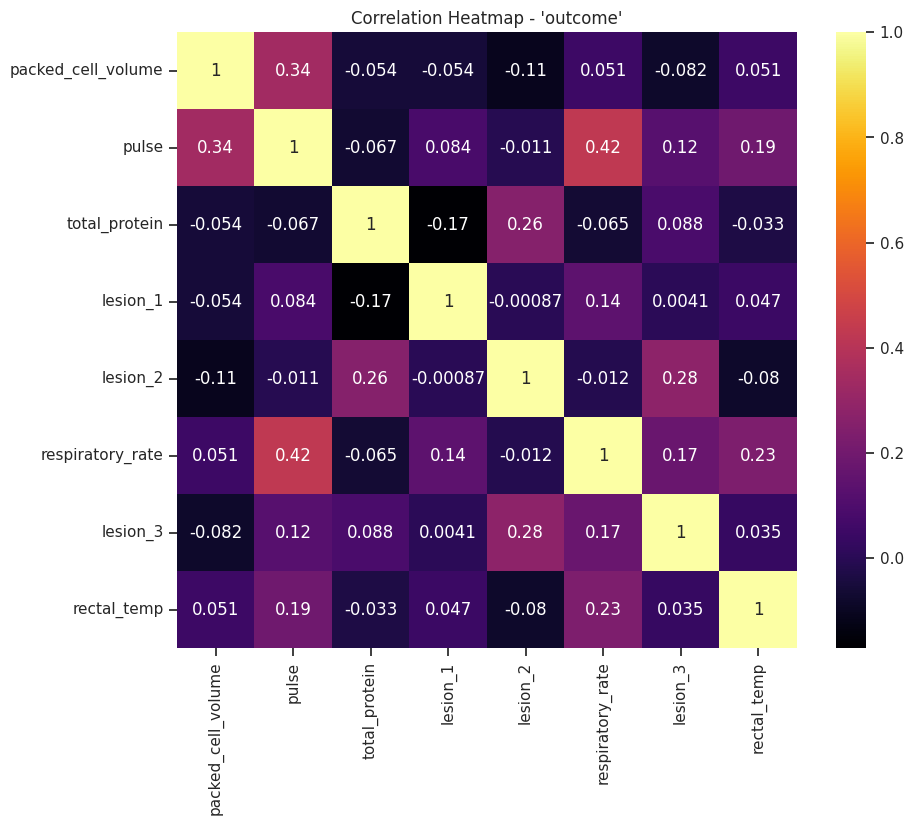

In [ ]:
# Correlation analysis is performed to examine the relationship between
# features and a target value, which in this case is 'outcome'
def analyze_correlation(dataset, target_column, num_of_top_correlations=10):
  correlation_matrix = dataset.corr()
  correlation_values = correlation_matrix[target_column].abs().sort_values(ascending=False)
  top_correlations = correlation_values[1:num_of_top_correlations+1]
  top_feats = top_correlations.index
  top_feats_matrix = dataset[top_feats].corr()
  print(f"Top {num_of_top_correlations} Correlation Values to '{target_column}':")
  print(top_correlations)

  # output a correlation heatmap
  plt.figure(figsize=(10,8))
  sns.heatmap(top_feats_matrix, annot=True, cmap="inferno")
  plt.title(f"Correlation Heatmap - '{target_column}'")
  plt.show()

target_column = "outcome"
analyze_correlation(merged_dataset, target_column, num_of_top_correlations=10)

In [ ]:
# Feature Engineering: One Hot Encoding
# Convert the rest of the categorical data to numeric
merged_dataset = pd.get_dummies(merged_dataset)
merged_dataset.head(10)

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome,lesion_1,lesion_2,lesion_3,surgery_no,...,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgical_lesion_no,surgical_lesion_yes
0,38.5,66.0,28.0,45.0,8.4,0,11300,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,39.2,88.0,20.0,50.0,85.0,1,2208,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,38.3,40.0,24.0,33.0,6.7,2,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
3,39.1,164.0,84.0,48.0,7.2,0,2208,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,37.3,104.0,35.0,74.0,7.4,0,4300,0,0,1,...,0,0,0,1,0,0,0,0,1,0
5,38.2,64.0,28.0,45.0,7.5,2,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
6,37.9,48.0,16.0,37.0,7.0,2,3124,0,0,0,...,1,0,0,1,0,0,0,0,0,1
7,38.2,60.0,28.0,44.0,8.3,0,2208,0,0,0,...,1,0,0,0,1,0,0,0,0,1
8,38.2,80.0,36.0,38.0,6.2,1,3205,0,0,1,...,1,0,0,1,0,0,0,0,0,1
9,38.3,90.0,28.0,40.0,6.2,2,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


#### Exploratory Analysis on Merged Dataset

In [ ]:
df = merged_dataset.iloc[:train_dataset_index]
test = merged_dataset.iloc[train_dataset_index:]

# Checking shape
print("Original training dataset")
print(f"Variables: {df.shape[1]}\nEntries: {df.shape[0]}\n")
print("Test dataset")
print(f"Variables: {test.shape[1]}\nEntries: {test.shape[0]}\n")

Original training dataset
Variables: 60
Entries: 299

Test dataset
Variables: 60
Entries: 89



This exploratory analysis is based on the merged dataset, which has been converted to include numeric representations of the categorical data.

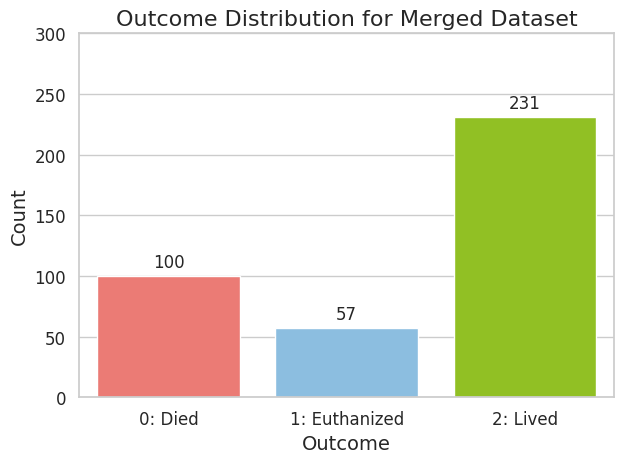

In [ ]:
# This exploratory analysis is based on the merged dataset, which has been
# converted to include numeric representations of the categorical data.

# Horse outcome distribution for merged dataset
custom_palette = ["#FF6961", "#7EC0EE", "#9bda0a"]
sns.set(style="whitegrid", palette=custom_palette)
ax = sns.countplot(data=merged_dataset, x='outcome')

# Set the x-axis tick labels
# 0: died, 1: euthanized, 2: lived
ax.set_xticklabels(['0: Died', '1: Euthanized', '2: Lived'])

# Add count labels above each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Outcome Distribution for Merged Dataset', fontsize=16)
plt.ylim(0, 300)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

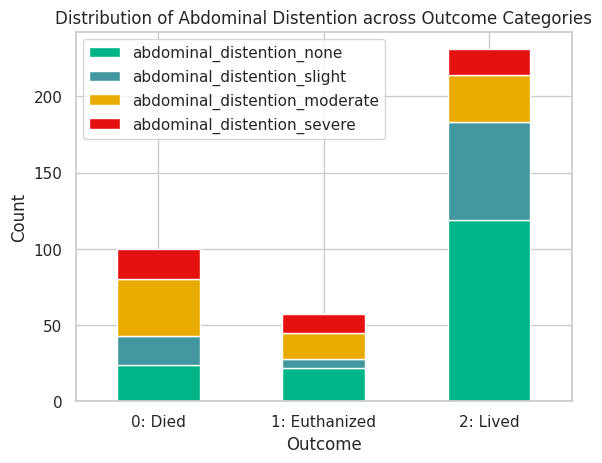

In [ ]:
# Abdominal distention is an important parameter, given that it causes severe
# pain in horses and often necessitates surgery to alleviate the pressure.
# As shown, a significant number of horses with moderate or severe levels of
# abdominal distention do not survive.

# Stacked bar plot of abdominal distention levels for each outcome category
abdominal_distention_cols = ['abdominal_distention_none', 'abdominal_distention_slight',
                             'abdominal_distention_moderate', 'abdominal_distention_severe']
outcome_labels = ['lived', 'died', 'euthanized']

# custom colors for each abdominal distention level
colors = ['#00b588', '#4297a0', '#eaab00', '#e51111']
# computer counts of abdominal distention levels for each outcome category
distention_counts = merged_dataset.groupby('outcome')[abdominal_distention_cols].sum()
distention_counts.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Abdominal Distention across Outcome Categories')
plt.legend(labels=abdominal_distention_cols)
ax = plt.gca()
ax.set_xticklabels(['0: Died', '1: Euthanized', '2: Lived'], rotation=0)
plt.show()

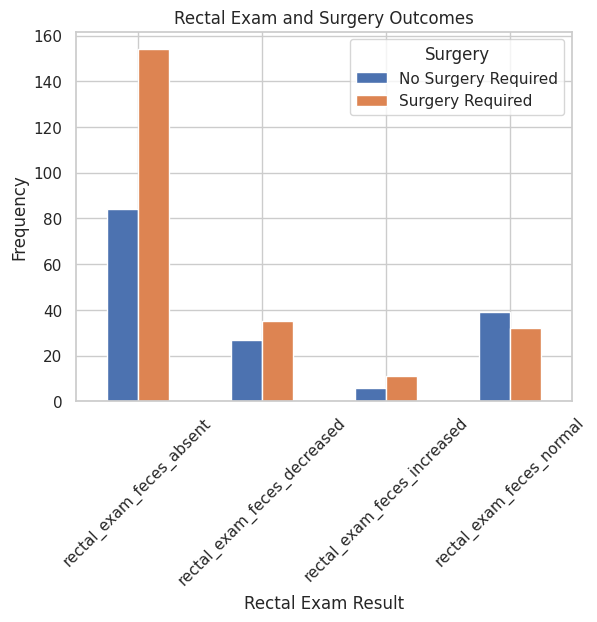

In [ ]:
# For horse rectal exams, the absence of feces suggests an obstruction,
# which is largely indicated by the plot as resulting in surgery.

rectal_exam_columns = ['rectal_exam_feces_absent', 'rectal_exam_feces_decreased',
                       'rectal_exam_feces_increased', 'rectal_exam_feces_normal', 'surgery_yes']

subset_df = merged_dataset[rectal_exam_columns]
rectal_exam_values = subset_df.groupby('surgery_yes').sum().transpose()

sns.set(style="whitegrid")
rectal_exam_values.plot(kind='bar', ax=plt.gca())
plt.xlabel('Rectal Exam Result')
plt.ylabel('Frequency')
plt.title('Rectal Exam and Surgery Outcomes')
plt.legend(['No Surgery Required', 'Surgery Required'], title='Surgery')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# The outcome variable needs to be removed in order to train the model effectively
X_train = df.drop("outcome", axis=1).values
Y_train = df["outcome"]
X_test  = test.drop("outcome", axis=1).values
Y_test  = test["outcome"]

### Approach 1: Random Forest Classifier


In [ ]:
# Random Forest Classifier
num_of_estimators = 100
random_forest = RandomForestClassifier(n_estimators=num_of_estimators, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
random_forest.fit(X_train, Y_train)

print('Random Forest Classifier Performance')
print('------------------------------------------------------')
# Calculate and print the training accuracy
train_accuracy = round(random_forest.score(X_train, Y_train) * 100, 2)
print(f'\nTraining Accuracy: {train_accuracy}%')
# Calculate and print the test accuracy
test_accuracy = round(random_forest.score(X_test, Y_test) * 100, 2)
print(f'Test Accuracy: {test_accuracy}%')
Y_pred = random_forest.predict(X_test)
# Calculate and print the confusion matrix
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=["Real"], colnames=["Predict"], margins=True)
# Format the confusion matrix output
confusion_matrix_formatted = confusion_matrix.copy()
confusion_matrix_formatted.index = ['Actual ' + str(label) for label in confusion_matrix.index]
confusion_matrix_formatted.columns = ['Predicted ' + str(label) for label in confusion_matrix.columns]
# Print the formatted confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix_formatted)

Random Forest Classifier Performance
------------------------------------------------------

Training Accuracy: 95.65%
Test Accuracy: 95.51%

Confusion Matrix:
            Predicted 0  Predicted 1  Predicted 2  Predicted All
Actual 0             22            0            1             23
Actual 1              0           10            3             13
Actual 2              0            0           53             53
Actual All           22           10           57             89


In [ ]:
# Create learning curve and arrays to store scores, training sizes 10% - 100%
train_sizes, train_scores, test_scores = learning_curve(random_forest, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
# Calculate/store mean scores and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
# Plot training and validation scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Validation score")
# Show variance of scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
# Labels, legend and grid
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Random Forest Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
# Random Forest Classifier

# Generate a classification report based on the predicted labels (Y_pred)
# and the true labels (Y_test).
report = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(report)
# Display the number of true positives, true negatives, false positives,
# and false negatives for each class.
confusion_matrix_value = pd.crosstab(Y_test, Y_pred)
sns.heatmap(confusion_matrix_value, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Approach 2: K-Nearest Neighbors Classifier

In [ ]:
# K-Nearest Neighbors Classifier

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# range of values to try for n_neighbors
param_grid = {'n_neighbors': [3, 5, 7, 9]}
# create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid)
# fit the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, Y_train)

# retrieve the best value of n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']
# KNN classifier with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
# cross-validation
scores = cross_val_score(knn, X_train_scaled, Y_train, cv=5)
# compute the mean and std of the cross-validation scores
mean_acc_knn = scores.mean() * 100
std_acc_knn = scores.std() * 100
# fit the KNN classifier on the training data
knn.fit(X_train_scaled, Y_train)
# predictions on the test data
Y_pred2 = knn.predict(X_test_scaled)
train_accuracy = accuracy_score(Y_train, knn.predict(X_train_scaled)) * 100

print('K-Nearest Neighbors Classifier Performance')
print('------------------------------------------------------')
print('Accuracy of the KNN model on the training set: {:.2f}%'.format(train_accuracy))
print('Optimal value of n_neighbors:', best_n_neighbors)
print('Mean accuracy of KNeighborsClassifier (after cross-validation): {:.2f}%'.format(mean_acc_knn))
print('Standard deviation of accuracy: {:.2f}%'.format(std_acc_knn))

# Calculate and print the confusion matrix
confusion_matrix_2 = pd.crosstab(Y_test, Y_pred2, rownames=["Real"], colnames=["Predict"], margins=True)
# Format the confusion matrix output
confusion_matrix_formatted_2 = confusion_matrix_2.copy()
confusion_matrix_formatted_2.index = ['Actual ' + str(label) for label in confusion_matrix_2.index]
confusion_matrix_formatted_2.columns = ['Predicted ' + str(label) for label in confusion_matrix_2.columns]
# Print the formatted confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix_formatted_2)

In [ ]:
# K-Nearest Neighbors Classifier

# Generate a classification report based on the predicted labels (Y_pred2)
# and the true labels (Y_test).
report2 = classification_report(Y_test, Y_pred2)
print('Classification Report:')
print(report2)
# Display the number of true positives, true negatives, false positives,
# and false negatives for each class.
confusion_matrix_value2 = pd.crosstab(Y_test, Y_pred2)
sns.heatmap(confusion_matrix_value2, annot=True, cmap="Oranges", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Create learning curve and arrays to store scores, training sizes 10% - 100%
train_sizes, train_scores, test_scores = learning_curve(knn, X_train_scaled, Y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate/store mean scores and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
# Plot training and validation scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Validation score")
# Show variance of scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
# Labels, legend and grid
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("kNN Classifier Learning Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Approach 3: Logistic Regression

In [ ]:
# Logistic Regression

# create and train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, Y_train)
# predictions on the training and test sets
Y_train_pred = logistic_regression_model.predict(X_train)
Y_test_pred = logistic_regression_model.predict(X_test)

print('Logistic Regression Performance')
print('------------------------------------------------------')

# compute the accuracy of the model on the training set
train_accuracy = round(accuracy_score(Y_train, Y_train_pred) * 100, 2)
print('Training Accuracy: {:.2f}%'.format(train_accuracy))
# compute the accuracy of the model on the test set
test_accuracy = round(accuracy_score(Y_test, Y_test_pred) * 100, 2)
print('Test Accuracy: {:.2f}%'.format(test_accuracy))

# confusion matrix
confusion_matrix_3 = pd.crosstab(Y_test, Y_test_pred, rownames=["Real"], colnames=["Predict"], margins=True)
confusion_matrix_formatted_3 = confusion_matrix_3.copy()
confusion_matrix_formatted_3.index = ['Actual ' + str(label) for label in confusion_matrix_3.index]
confusion_matrix_formatted_3.columns = ['Predicted ' + str(label) for label in confusion_matrix_3.columns]
print("\nConfusion Matrix:")
print(confusion_matrix_formatted_3)

In [ ]:
# Logistic Regression

# Generate a classification report based on the predicted labels (Y_test_pred)
# and the true labels (Y_test).
report3 = classification_report(Y_test, Y_test_pred)
print('Classification Report:')
print(report3)

confusion_matrix_value3 = pd.crosstab(Y_test, Y_test_pred)
sns.heatmap(confusion_matrix_value3, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Create learning curve and arrays to store scores, training sizes 10% - 100%
train_sizes, train_scores, test_scores = learning_curve(logistic_regression_model, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate/store mean scores and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
# Plot training and validation scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Validation score")
# Show variance of scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
# Labels, legend and grid
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Learning Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Approach 4: Decision Tree

In [ ]:
# Decison Tree
# hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_

# check for the best hyperparameters
decision_tree = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features']
)

decision_tree.fit(X_train, Y_train)
# predictions on the training set
Y_train_pred_dt = decision_tree.predict(X_train)
# predictions on the test set
Y_test_pred_dt = decision_tree.predict(X_test)

print('Decision Tree Performance')
print('------------------------------------------------------')

train_accuracy = accuracy_score(Y_train, Y_train_pred_dt)
print('Training Accuracy:', "{:.2%}".format(train_accuracy))
test_accuracy = accuracy_score(Y_test, Y_test_pred_dt)
print('Test Accuracy:', "{:.2%}".format(test_accuracy), "\n")

# output the best parameters from grid search
print("Best hyperparameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# confusion matrix
confusion_matrix_4 = pd.crosstab(Y_test, Y_test_pred_dt, rownames=["Real"], colnames=["Predict"], margins=True)
confusion_matrix_formatted_4 = confusion_matrix_4.copy()
confusion_matrix_formatted_4.index = ['Actual ' + str(label) for label in confusion_matrix_4.index]
confusion_matrix_formatted_4.columns = ['Predicted ' + str(label) for label in confusion_matrix_4.columns]
print("\nConfusion Matrix:")
print(confusion_matrix_formatted_4)

In [ ]:
# Decision Tree

# Generate a classification report based on the predicted labels (Y_test_pred_dt)
# and the true labels (Y_test).
report4 = classification_report(Y_test, Y_test_pred_dt)
print('Classification Report:')
print(report4)

confusion_matrix_value4 = pd.crosstab(Y_test, Y_test_pred_dt)
sns.heatmap(confusion_matrix_value4, annot=True, cmap="Purples", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
target = ['Outcome']

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=df.columns[:-1])

# Get unique class names from the target variable
class_names = np.unique(Y_train).astype(str)

dot_data = export_graphviz(decision_tree, precision=1,
                           feature_names=X_train_df.columns,
                           proportion=True,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph